# Marketing A/B Testing  
In the competitive world of digital marketing, understanding what drives user conversion is key to optimizing ad spend and campaign strategy. Companies invest heavily in marketing efforts, but without proper analysis, it's hard to know what actually works.

In this project, I will:

- Compare conversion rates across A/B test groups to evaluate campaign effectiveness.
- Analyze the relationship between the number of ads shown and conversion likelihood.
- Use statistical tests (Chi-Square and Mann-Whitney U) to assess significance.
- Examine which days and hours generate the most conversions.
- Visualize insights through boxplots, bar charts, and crosstabs using Python libraries.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'D:\2025 Job prep\Python\marketing_AB.csv')

## EDA

In [4]:
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [5]:
df.shape

(588101, 7)

In [6]:
df[df.duplicated()]

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour


In [7]:
df[df.duplicated(subset = 'user id')]

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour


In [8]:
df.duplicated(subset = 'user id').sum()

0

In [9]:
#Drop unwanted columns
df.drop(['Unnamed: 0','user id'],axis = 1, inplace=True)

In [10]:
df.columns

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [11]:
df.isnull().sum()

test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

In [12]:
df_cat = df[['test group','converted','most ads day','most ads hour']]
df_cat.nunique()

test group        2
converted         2
most ads day      7
most ads hour    24
dtype: int64

In [13]:
for i in df_cat:
    print(i.upper(),":",df[i].unique())

TEST GROUP : ['ad' 'psa']
CONVERTED : [False  True]
MOST ADS DAY : ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']
MOST ADS HOUR : [20 22 18 10 14 13 19 11 12 16 21  3 23  4  8  0  2 15  1  6 17  7  9  5]


## Univariate Analysis

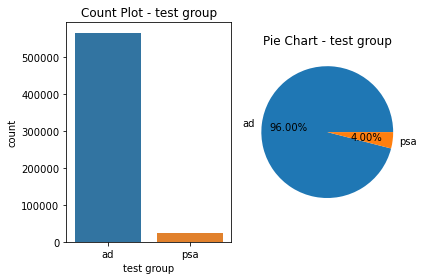

In [14]:
variable = 'test group'

plt.figure(figsize=(6,4))

plt.subplot(1,2,1)
sns.countplot(x=variable, data = df_cat)
plt.title(f'Count Plot - {variable}')

plt.subplot(1,2,2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels = counts.index, autopct = '%0.2f%%')
plt.title(f"Pie Chart - {variable}")

plt.tight_layout()

plt.show()

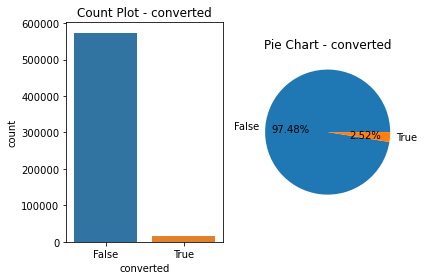

In [15]:
variable = 'converted'

plt.figure(figsize=(6,4))

plt.subplot(1,2,1)
sns.countplot(x=variable, data = df_cat)
plt.title(f'Count Plot - {variable}')

plt.subplot(1,2,2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels = counts.index, autopct = '%0.2f%%')
plt.title(f"Pie Chart - {variable}")

plt.tight_layout()

plt.show()

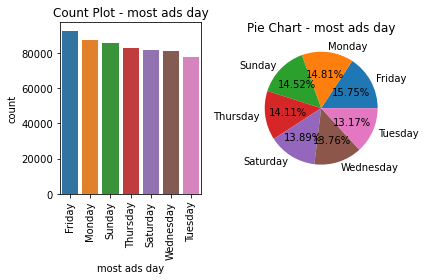

In [16]:
variable = 'most ads day'

plt.figure(figsize=(6,4))

plt.subplot(1,2,1)
sns.countplot(x=variable, data = df_cat, order=df_cat[variable].value_counts().index)
plt.title(f'Count Plot - {variable}')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels = counts.index, autopct = '%0.2f%%')
plt.title(f"Pie Chart - {variable}")

plt.tight_layout()

plt.show()

In [17]:
df_cat['most ads day'].value_counts()

Friday       92608
Monday       87073
Sunday       85391
Thursday     82982
Saturday     81660
Wednesday    80908
Tuesday      77479
Name: most ads day, dtype: int64

In [18]:
df_cat['most ads hour'].value_counts()

13    47655
12    47298
11    46210
14    45648
15    44683
10    38939
16    37567
17    34988
18    32323
9     31004
19    30352
21    29976
20    28923
22    26432
23    20166
8     17627
7      6405
0      5536
2      5333
1      4802
3      2679
6      2068
5       765
4       722
Name: most ads hour, dtype: int64

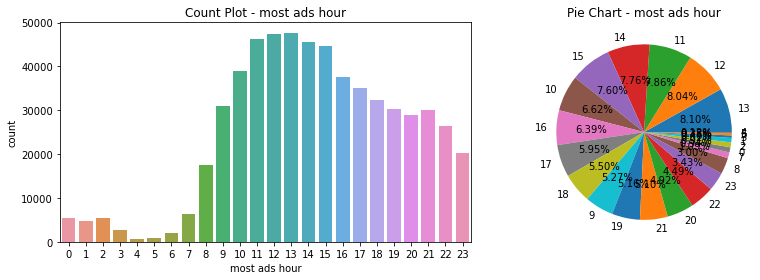

In [19]:
variable = 'most ads hour'

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.countplot(x=variable, data = df_cat)
plt.title(f'Count Plot - {variable}')

plt.subplot(1,2,2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels = counts.index, autopct = '%0.2f%%')
plt.title(f"Pie Chart - {variable}")

plt.tight_layout()

plt.show()

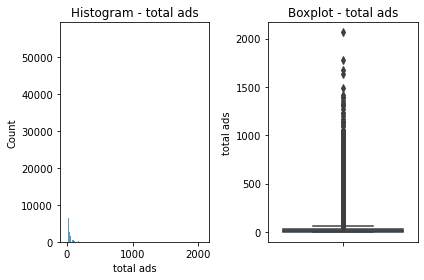

In [20]:
variable = 'total ads'

plt.figure(figsize=(6,4))
plt.subplot(1,2,1)
sns.histplot(data=df, x=variable)
plt.title(f'Histogram - {variable}')

plt.subplot(1,2,2)
sns.boxplot(data=df, y=variable)
plt.title(f'Boxplot - {variable}')

plt.tight_layout()

plt.show()

In [21]:
df['total ads'].describe()

count    588101.000000
mean         24.820876
std          43.715181
min           1.000000
25%           4.000000
50%          13.000000
75%          27.000000
max        2065.000000
Name: total ads, dtype: float64

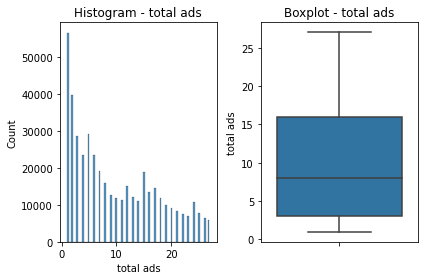

In [22]:
variable = 'total ads'

plt.figure(figsize=(6,4))
plt.subplot(1,2,1)
sns.histplot(data=df[df['total ads']<=27], x=variable)
plt.title(f'Histogram - {variable}')

plt.subplot(1,2,2)
sns.boxplot(data=df[df['total ads']<=27], y=variable)
plt.title(f'Boxplot - {variable}')

plt.tight_layout()

plt.show()

## Bivariate Analysis

In [23]:
df.columns

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [24]:
ct_conversion_test_group = pd.crosstab(index=df['test group'], columns=df['converted'])
ct_conversion_test_group

converted,False,True
test group,,
ad,550154,14423
psa,23104,420


In [25]:
ct_conversion_test_group = pd.crosstab(index=df['test group'], columns=df['converted'], normalize = 'index')
ct_conversion_test_group

converted,False,True
test group,,
ad,0.974453,0.025547
psa,0.982146,0.017854


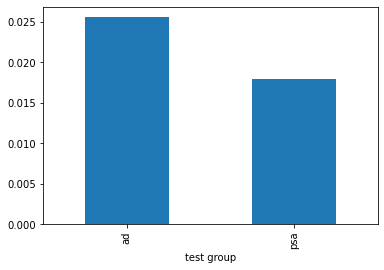

In [26]:
ct_conversion_test_group[True].plot.bar()

Users who were shown ads converted at a higher rate (2.5%) compared to users who weren’t shown ads (1.7%).

converted        False     True 
most ads day                    
Monday        0.967188  0.032812
Tuesday       0.970160  0.029840
Wednesday     0.975058  0.024942
Sunday        0.975524  0.024476
Friday        0.977788  0.022212
Thursday      0.978429  0.021571
Saturday      0.978949  0.021051


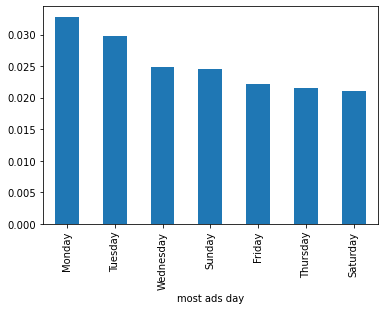

In [29]:
ct__group_day = pd.crosstab(index = df_cat['most ads day'], 
                                   columns = df_cat['converted'], 
                                   normalize = 'index' )
ct__group_day_sorted = ct__group_day.sort_values(by=True, ascending=False)
print(ct__group_day_sorted)
ct__group_day_sorted[True].plot.bar()

- Monday and Tuesday have the highest conversion rates among all days
- Further statistical testing is needed to confirm whether the day of the week has a statistically significant impact on conversion rates.

converted         False     True 
most ads hour                    
16             0.969228  0.030772
20             0.970197  0.029803
15             0.970347  0.029653
21             0.971077  0.028923
17             0.971790  0.028210
14             0.971937  0.028063
18             0.972620  0.027380
19             0.973280  0.026720
22             0.973895  0.026105
13             0.975323  0.024677
12             0.976172  0.023828
23             0.977338  0.022662
6              0.977756  0.022244
11             0.977884  0.022116
10             0.978479  0.021521
5              0.979085  0.020915
8              0.980484  0.019516
9              0.980809  0.019191
0              0.981575  0.018425
7              0.981889  0.018111
4              0.984765  0.015235
1              0.987089  0.012911
3              0.989548  0.010452
2              0.992687  0.007313


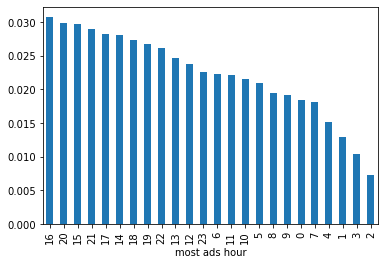

In [33]:
ct__group_hour = pd.crosstab(index = df_cat['most ads hour'], 
                                   columns = df_cat['converted'], 
                                   normalize = 'index' )
ct__group_hour_sorted = ct__group_hour.sort_values(by=True, ascending=False)
print(ct__group_hour_sorted)
ct__group_hour_sorted[True].plot.bar()

- Conversion rate is highest 2-5pm and then from 8-9pm 
- Further statistical testing is needed to confirm whether the hour of the day has a statistically significant impact on conversion rates.

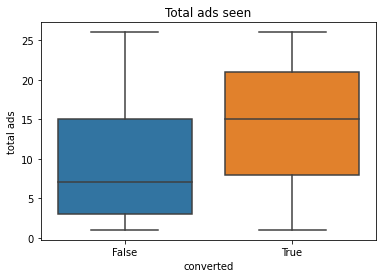

In [34]:
sns.boxplot(data =df[df['total ads']<27] , x='converted', y='total ads')
plt.title("Total ads seen")

plt.show()

- Conversion rate for people who saw more ads is higher compared to people who saw less ads.
- Further statistical testing is needed to confirm whether the number of ads has a statistically significant impact on conversion rates.

## Statistical Tests

The Chi-Square test is used to check whether there's a significant association between two categorical variables. In this case, it helps us determine if conversion rates vary meaningfully across different test groups, days, or hours — rather than just by chance.

In [40]:
from scipy.stats import chi2_contingency

alpha = 0.05

for variable in df_cat.columns:
    if variable != 'converted':
        
        contingency_table = pd.crosstab(index=df_cat[variable], columns=df_cat['converted'] )
        #print(contingency_table)
        
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        
        print(f"Chi-sqaured test for {variable} and converted")
        print(f"chi2 value {chi2}")
        print(f"p-value {p}")
        
        if p<alpha:
            print(f"The difference in conversation rate across {variable} is significant \n")
        else:
            print(f"There is no significant difference in conversion rate across {variable} \n")

Chi-sqaured test for test group and converted
chi2 value 54.005823883685245
p-value 1.9989623063390075e-13
The difference in conversation rate across test group is significant 

Chi-sqaured test for most ads day and converted
chi2 value 410.0478857936585
p-value 1.932184379244731e-85
The difference in conversation rate across most ads day is significant 

Chi-sqaured test for most ads hour and converted
chi2 value 430.76869230822086
p-value 8.027629823696771e-77
The difference in conversation rate across most ads hour is significant 



**Chi-Square Test Results Summary:
There is a statistically significant association between conversion rate and each of the following variables: test group, most ads day, and most ads hour. This means that whether a user converts is influenced by the type of content they saw (ads vs PSA), the day of the week, and the hour of the day they were exposed to ads or PSAs. These findings highlight the importance of both message type and timing in influencing user behavior.**

Before comparing the average number of ads seen between converted and non-converted users, we need to check if the data meets the assumptions for a parametric test (t-test):

Shapiro-Wilk test checks if the data is normally distributed in each group.

Levene’s test checks if the variances are equal between groups.

If both tests pass (p > 0.05), we can use an independent t-test. If not, we should use a non-parametric test like the Mann-Whitney U test.

In [35]:
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu

shapiro_stat_true, shapiro_p_value_true = shapiro(df[df['converted'] == True]['total ads'])
shapiro_stat_false, shapiro_p_value_false = shapiro(df[df['converted'] == False]['total ads'])

print("Shapiro-Wilk test for normality(true group): p=value",shapiro_p_value_true)
print("Shapiro-Wilk test for normality(false group): p=value",shapiro_p_value_false)

levene_stat, levene_p_value = levene(df[df['converted']]['total ads'], df[~df['converted']]['total ads'])
print("Levene test p-value",levene_p_value)

Shapiro-Wilk test for normality(true group): p=value 0.0
Shapiro-Wilk test for normality(false group): p=value 0.0
Levene test p-value 0.0


C:\Users\14699\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Both the Shapiro-Wilk and Levene’s tests returned p-values of 0.0, indicating that the data is not normally distributed and the variances are unequal between the converted and non-converted groups. Therefore, a non-parametric test like the Mann-Whitney U test is more appropriate for comparing the number of ads seen.

In [36]:
alpha = 0.05

if shapiro_p_value_true > alpha and shapiro_p_value_false > alpha and levene_p_value > alpha:
    t_stat, t_p_value = ttest_ind(df[df['converted']]['total ads'], df[~df['converted']]['total ads'])
    print("independent t test p-value ",t_p_value)
else:
    u_stat, u_p_value = mannwhitneyu(df[df['converted']]['total ads'], df[~df['converted']]['total ads'])
    print("Mann Whitney U test p-value ",u_p_value)

Mann Whitney U test p-value  0.0


The Mann-Whitney U test returned a p-value of 0.0, indicating a statistically significant difference in the number of ads seen between users who converted and those who did not. This suggests that the number of ads a user sees is associated with their likelihood to convert.

**Conclusion:**

The analysis shows that users exposed to ads convert at a higher rate than those shown PSAs. Statistical testing confirms a significant association between conversion and key factors like the type of message (ad vs PSA), day of the week, and hour of the day.

Conversion is highest when ads are shown between 2–5 PM and 8–9 PM, and early in the week (Monday, Tuesday).

Users who converted were exposed to significantly more ads than those who didn’t, as shown by the Mann-Whitney U test (p < 0.05).

The Chi-Square tests confirm that timing and message type are statistically associated with conversion.

**Recommendation:** Optimize ad delivery timing to align with high-conversion windows and explore A/B testing for stronger validation.